In [1]:
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.linear_model import LinearRegression
#from IPython.display import clear_output
#from itertools import combinations_with_replacement
#from itertools import combinations
#import seaborn as sns
#import math

import data as dt
import analysis_functions as af
import backtest as bt
import indicators as indi
import signals as sg

plt.rcParams["figure.figsize"] = (30,10)
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('DataH163k.csv', sep=',').drop(columns=['Unnamed: 0'])

In [ ]:
data.isna().sum().sum()

In [ ]:
data

In [ ]:
data.iloc[:,-56:].sum().sum()

In [ ]:
data[['eur','usd','jpy','gbp','chf','aud','nzd','cad']]

In [7]:
%%time
data_numpy = dt.pandas_to_array(data)

Wall time: 1.37 s


In [12]:
%%time
no_tpsl, _, _ = bt.otimizado_no_tpsl(data_numpy, balance=1000)
no_tpsl = np.delete(no_tpsl, np.where(no_tpsl == 0.))
#sell_orders = np.delete(sell_orders, np.where(sell_orders == 0.))
#buy_orders = sell_orders = np.delete(buy_orders, np.where(buy_orders == 0.))

Wall time: 61.8 ms


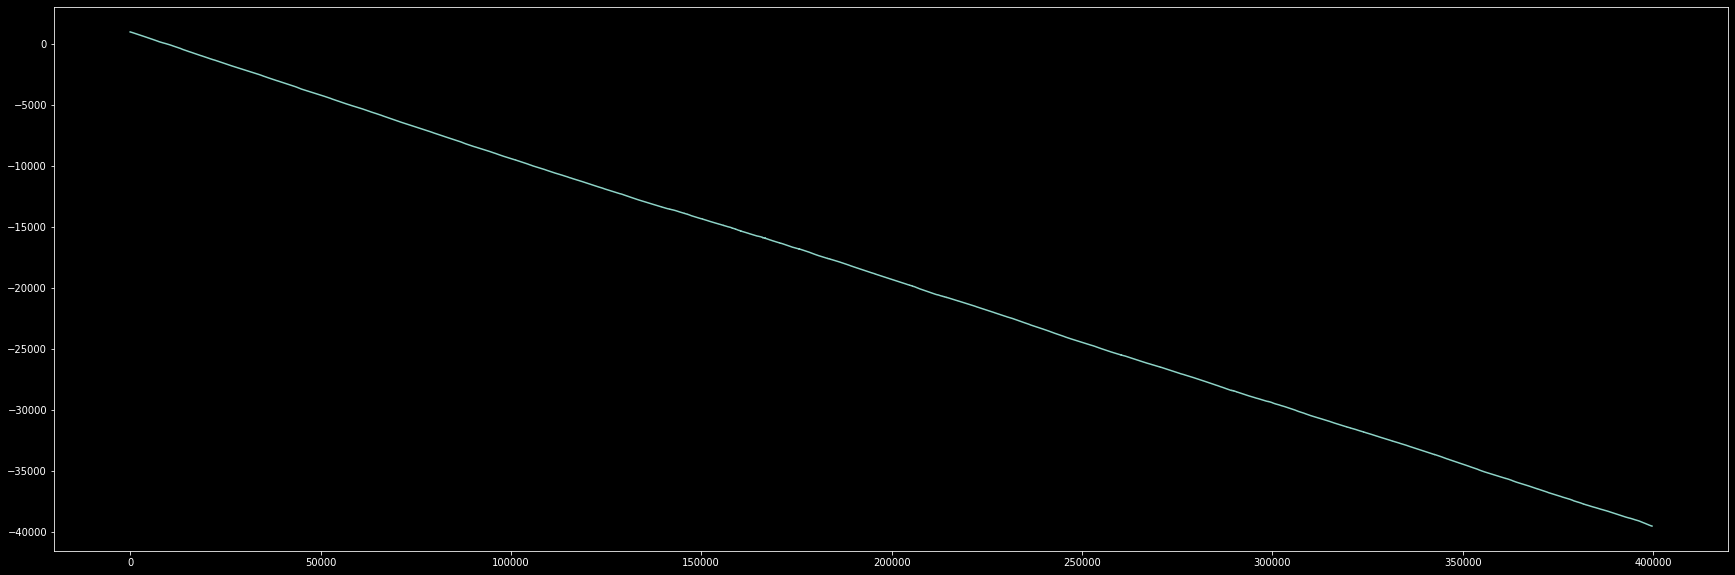

In [13]:
pd.Series(no_tpsl).plot()
plt.show()

In [ ]:
# 1 = 2.5s
# 2 = 140ms

In [ ]:
# 1 = 2.3s
# 2 = 45ms

In [18]:
%%time

mt5.initialize()
if not mt5.initialize(login=50549136,password='TqmGUgqp',server='ICMarketsSC-Demo'):
    print('MT5 não iniciado.')
    mt5.shutdown()

df = dt.get_data(0, 63000, mt5.TIMEFRAME_H1, all_four = True)
    
mt5.shutdown()

massive_test = pd.DataFrame()

for h in (np.arange(50,100,5)/100):

    data = dt.pct_data(df, period=1)
    data = sg.pct_data_signals_quantile(data, high=h, low=1-h)
    data_numpy = dt.pandas_to_array(data)
    no_tpsl, _, _ = bt.otimizado_no_tpsl(data_numpy, balance=1000)

    massive_test[f'{h}_{i}'] = pd.Series(no_tpsl)



Wall time: 15.3 s


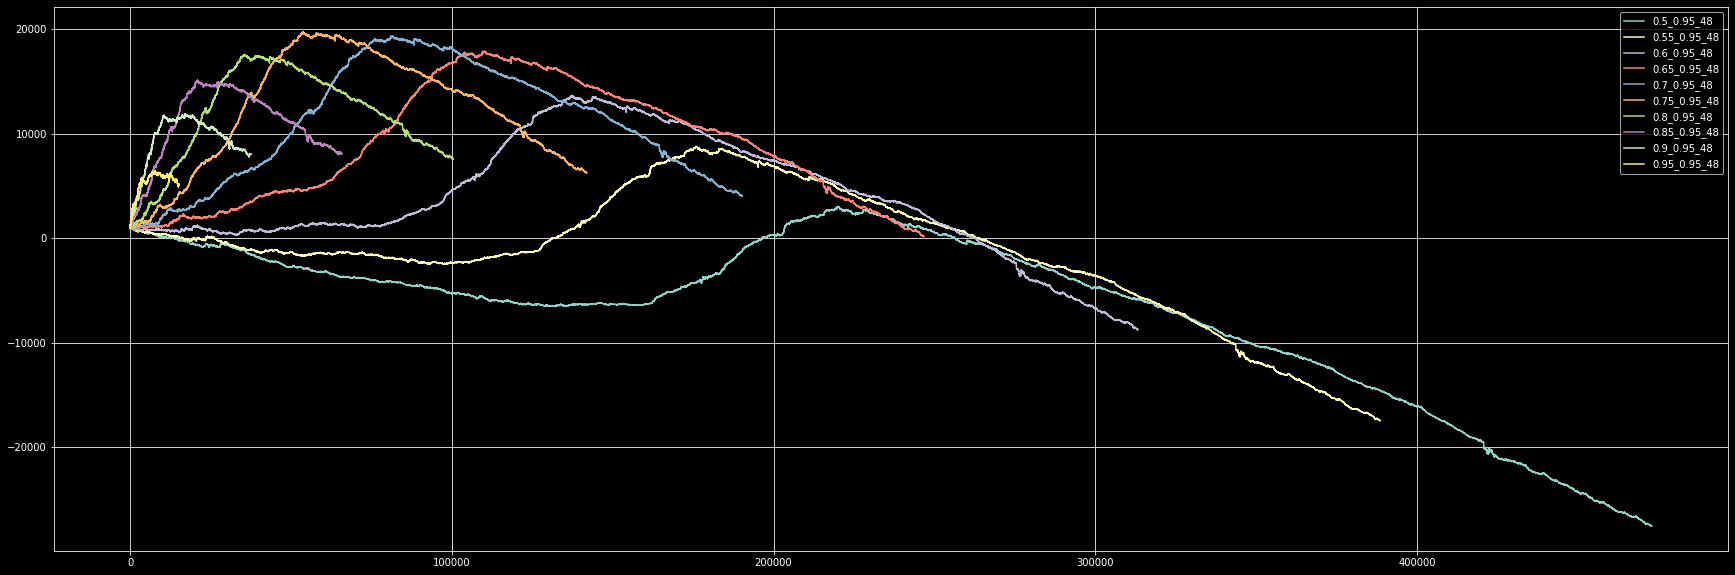

In [19]:
massive_test.plot()
plt.grid()
plt.show()
plt.close()

In [16]:
bests_results_lr = []
cut = 0.0
for i in massive_test.columns:
    lr_test = pd.DataFrame()
    lr_test['x'] = pd.Series(range(len(massive_test[i].dropna())))
    lr_test['y'] = massive_test[i].dropna()
    x_v = lr_test[['x']]
    y_v = lr_test[['y']]
    model = LinearRegression()
    model.fit(x_v, y_v)
    result = model.score(x_v, y_v)
    if result > cut:
        bests_results_lr.append(i)
        cut = result

<AxesSubplot:>

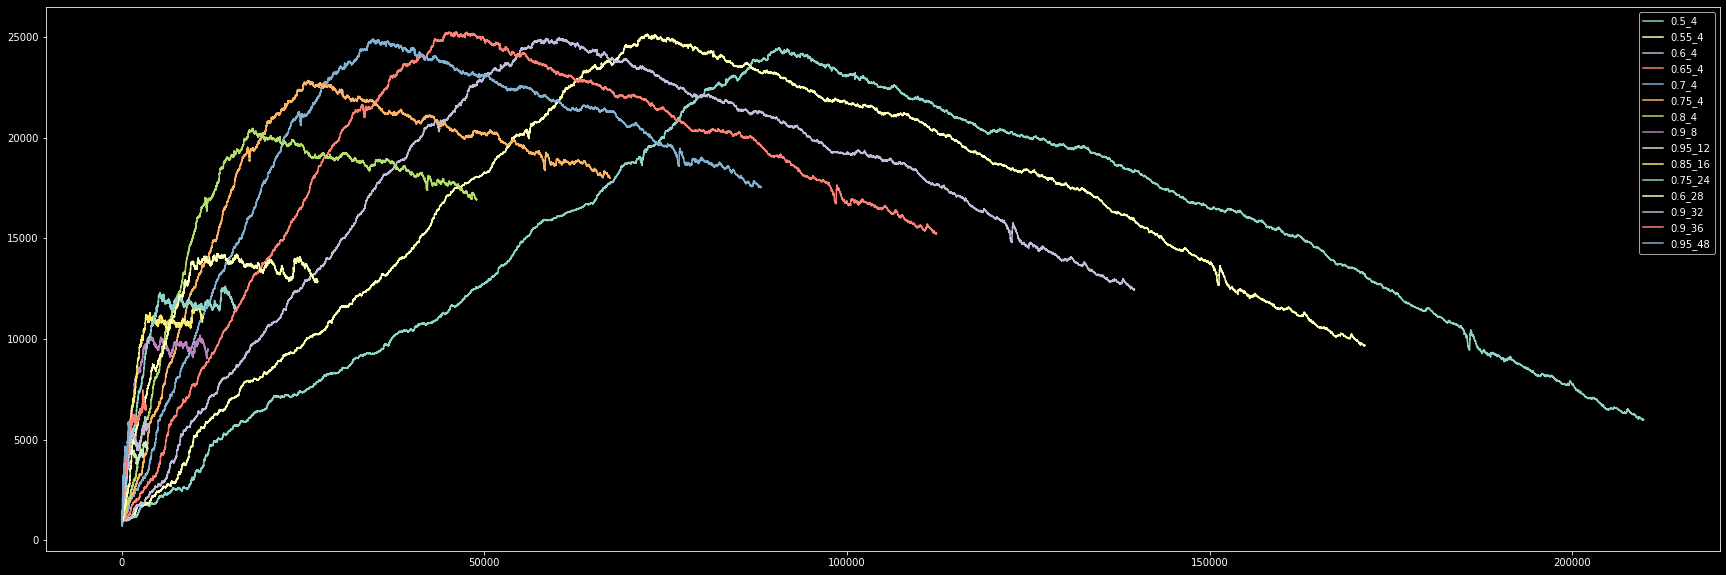

In [17]:
massive_test[bests_results_lr].plot()